In [1]:
import pandas as pd
import re       # need this for conversions
from datetime import datetime  # need for age DOB conversion -> AGE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
tott = pd.read_csv("ufc_fighter_tott.csv")
tott.head()


,FIGHTER,HEIGHT,WEIGHT,REACH,STANCE,DOB,URL
0,Tom Aaron,--,155 lbs.,--,NaN,"Jul 13, 1978",http://ufcstats.com/fighter-details/93fe7332d1...
1,Danny Abbadi,"5' 11""",155 lbs.,--,Orthodox,"Jul 03, 1983",http://ufcstats.com/fighter-details/15df64c02b...
2,David Abbott,"6' 0""",265 lbs.,--,Switch,--,http://ufcstats.com/fighter-details/b361180739...
3,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",http://ufcstats.com/fighter-details/2f5cbecbbe...
4,Hiroyuki Abe,"5' 6""",145 lbs.,--,Orthodox,--,http://ufcstats.com/fighter-details/c0ed7b2081...


In [3]:
# Analyzing the general data 
tott.shape  

(4442, 7)

In [4]:
tott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4442 entries, 0 to 4441
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FIGHTER  4442 non-null   object
 1   HEIGHT   4442 non-null   object
 2   WEIGHT   4442 non-null   object
 3   REACH    4442 non-null   object
 4   STANCE   2949 non-null   object
 5   DOB      4442 non-null   object
 6   URL      4442 non-null   object
dtypes: object(7)
memory usage: 243.1+ KB


### Time for cleaning
- clean up FIGHTER white space
- convert HEIGHT and REACH to inches, (numeric)
- convert DOB to age (numeric)
- normalize STANCE
- clean up WEIGHT (get rid of lb and '--' and convert to numeric)


In [5]:
# remove the extra spaces 
tott["FIGHTER"] = tott["FIGHTER"].str.strip()

In [6]:
# converting HEIGHT to inches
def height_to_inches(h):
    if pd.isna(h):
        return None
    
    # remove leading/trailing spaces just in case
    h = h.strip()  

    # match format like 5' 11" or 6'2"
    m = re.match(r"(\d+)'\s*(\d+)\"?", h)
    if m:
        return int(m.group(1)) * 12 + int(m.group(2))
    return None

tott['HEIGHT_IN'] = tott['HEIGHT'].apply(height_to_inches)
tott.head()



,FIGHTER,HEIGHT,WEIGHT,REACH,STANCE,DOB,URL,HEIGHT_IN
0,Tom Aaron,--,155 lbs.,--,NaN,"Jul 13, 1978",http://ufcstats.com/fighter-details/93fe7332d1...,NaN
1,Danny Abbadi,"5' 11""",155 lbs.,--,Orthodox,"Jul 03, 1983",http://ufcstats.com/fighter-details/15df64c02b...,71.0
2,David Abbott,"6' 0""",265 lbs.,--,Switch,--,http://ufcstats.com/fighter-details/b361180739...,72.0
3,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",http://ufcstats.com/fighter-details/2f5cbecbbe...,75.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,--,Orthodox,--,http://ufcstats.com/fighter-details/c0ed7b2081...,66.0


In [7]:
# cleaning REACH column and converting to numeric
tott["REACH"] = tott["REACH"].str.replace('"', "", regex=False).str.strip()
tott["REACH"] = pd.to_numeric(tott["REACH"], errors= 'coerce')
tott.head(15)

,FIGHTER,HEIGHT,WEIGHT,REACH,STANCE,DOB,URL,HEIGHT_IN
0,Tom Aaron,--,155 lbs.,NaN,NaN,"Jul 13, 1978",http://ufcstats.com/fighter-details/93fe7332d1...,NaN
1,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",http://ufcstats.com/fighter-details/15df64c02b...,71.0
2,David Abbott,"6' 0""",265 lbs.,NaN,Switch,--,http://ufcstats.com/fighter-details/b361180739...,72.0
3,Shamil Abdurakhimov,"6' 3""",235 lbs.,76.0,Orthodox,"Sep 02, 1981",http://ufcstats.com/fighter-details/2f5cbecbbe...,75.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,--,http://ufcstats.com/fighter-details/c0ed7b2081...,66.0
5,Daichi Abe,"5' 11""",170 lbs.,71.0,Orthodox,"Nov 27, 1991",http://ufcstats.com/fighter-details/5140122c3e...,71.0
6,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",http://ufcstats.com/fighter-details/c9f6385af6...,71.0
7,Ricardo Abreu,"5' 11""",185 lbs.,NaN,Orthodox,"Apr 27, 1984",http://ufcstats.com/fighter-details/aa6e591c2a...,71.0
8,Klidson Abreu,"6' 0""",205 lbs.,74.0,Orthodox,"Dec 24, 1992",http://ufcstats.com/fighter-details/7279654c76...,72.0
9,Daniel Acacio,"5' 8""",180 lbs.,NaN,Orthodox,"Dec 27, 1977",http://ufcstats.com/fighter-details/1c5879330d...,68.0


In [8]:
# converting DOB to age. First I convert the column to datetime
tott["DOB"] = pd.to_datetime(tott["DOB"], errors = 'coerce')

# now calculate the age in years as of today 9/8/2025 and store in new column AGE
cut_off_date = pd.to_datetime("2025-09-08")
tott["AGE"] = (cut_off_date - tott["DOB"]).dt.days // 365

#checking for the updates
tott.head()

,FIGHTER,HEIGHT,WEIGHT,REACH,STANCE,DOB,URL,HEIGHT_IN,AGE
0,Tom Aaron,--,155 lbs.,NaN,NaN,1978-07-13,http://ufcstats.com/fighter-details/93fe7332d1...,NaN,47.0
1,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,1983-07-03,http://ufcstats.com/fighter-details/15df64c02b...,71.0,42.0
2,David Abbott,"6' 0""",265 lbs.,NaN,Switch,NaT,http://ufcstats.com/fighter-details/b361180739...,72.0,NaN
3,Shamil Abdurakhimov,"6' 3""",235 lbs.,76.0,Orthodox,1981-09-02,http://ufcstats.com/fighter-details/2f5cbecbbe...,75.0,44.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaT,http://ufcstats.com/fighter-details/c0ed7b2081...,66.0,NaN


In [9]:
# analyzing the STANCE column for cleaning next
tott['STANCE'].unique()

array([nan, 'Orthodox', 'Switch', 'Southpaw', 'Open Stance', 'Sideways'],
      dtype=object)

In [10]:
# filling STANCE na's 
tott["STANCE"] = tott["STANCE"].fillna('Unknown')
tott.head()

,FIGHTER,HEIGHT,WEIGHT,REACH,STANCE,DOB,URL,HEIGHT_IN,AGE
0,Tom Aaron,--,155 lbs.,NaN,Unknown,1978-07-13,http://ufcstats.com/fighter-details/93fe7332d1...,NaN,47.0
1,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,1983-07-03,http://ufcstats.com/fighter-details/15df64c02b...,71.0,42.0
2,David Abbott,"6' 0""",265 lbs.,NaN,Switch,NaT,http://ufcstats.com/fighter-details/b361180739...,72.0,NaN
3,Shamil Abdurakhimov,"6' 3""",235 lbs.,76.0,Orthodox,1981-09-02,http://ufcstats.com/fighter-details/2f5cbecbbe...,75.0,44.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaT,http://ufcstats.com/fighter-details/c0ed7b2081...,66.0,NaN


In [11]:
# cleaning up WEIGHT columnn
tott['WEIGHT'] = tott['WEIGHT'].str.extract(r'(\d+)', expand=False)  # get only the digits

# converting to numeric
tott['WEIGHT'] = pd.to_numeric(tott['WEIGHT'], errors='coerce')

tott.head(5)


,FIGHTER,HEIGHT,WEIGHT,REACH,STANCE,DOB,URL,HEIGHT_IN,AGE
0,Tom Aaron,--,155.0,NaN,Unknown,1978-07-13,http://ufcstats.com/fighter-details/93fe7332d1...,NaN,47.0
1,Danny Abbadi,"5' 11""",155.0,NaN,Orthodox,1983-07-03,http://ufcstats.com/fighter-details/15df64c02b...,71.0,42.0
2,David Abbott,"6' 0""",265.0,NaN,Switch,NaT,http://ufcstats.com/fighter-details/b361180739...,72.0,NaN
3,Shamil Abdurakhimov,"6' 3""",235.0,76.0,Orthodox,1981-09-02,http://ufcstats.com/fighter-details/2f5cbecbbe...,75.0,44.0
4,Hiroyuki Abe,"5' 6""",145.0,NaN,Orthodox,NaT,http://ufcstats.com/fighter-details/c0ed7b2081...,66.0,NaN


In [12]:
# just checking:  
tott['WEIGHT'].unique()

# 770 pounds is an anomaly that needs erasing. 

array([155., 265., 235., 145., 170., 185., 205., 180., 225., 125., 115.,
       135., 245., 264., 188.,  nan, 250., 199., 154., 315., 190., 230.,
       240., 160., 200., 251., 255., 247., 256., 161., 210., 260., 243.,
       239., 215., 113., 259., 345., 183., 275., 236., 286., 244., 261.,
       212., 178., 228., 330., 224., 335., 220., 232., 139., 238., 175.,
       246., 253., 192., 130., 280., 350., 323., 219., 168., 194., 249.,
       242., 216., 241., 150., 181., 290., 258., 214., 300., 270., 257.,
       295., 254., 226., 196., 167., 149., 266., 385., 195., 390., 400.,
       193., 227., 263., 229., 320., 310., 143., 262., 237., 285., 410.,
       165., 105., 207., 248., 221., 217., 233., 430., 197., 186., 234.,
       231., 198., 770.])

In [13]:
# got rid of the anomaly
tott = tott[tott['WEIGHT'] != 770]

### Now that this table is clean, time to import the Fights table, clean it, and merge the two to analyze patterns

In [14]:
# loading up the fight results data
fights = pd.read_csv("ufc_fight_results.csv")
fights.head(5)

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL
0,UFC Fight Night: Imavov vs. Borralho,Nassourdine Imavov vs. Caio Borralho,W/L,Middleweight Bout,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Marc Goddard,Derek Cleary 45 - 50.Ben Cartlidge 46 - 49.Dav...,http://ufcstats.com/fight-details/5bcd8abf6da0...
1,UFC Fight Night: Imavov vs. Borralho,Benoit Saint Denis vs. Mauricio Ruffy,W/L,Lightweight Bout,Submission,2,2:56,3 Rnd (5-5-5),Herb Dean,Rear Naked Choke,http://ufcstats.com/fight-details/d14fea437127...
2,UFC Fight Night: Imavov vs. Borralho,Modestas Bukauskas vs. Paul Craig,W/L,Light Heavyweight Bout,KO/TKO,1,5:00,3 Rnd (5-5-5),Marc Goddard,Elbow to Head From Guard,http://ufcstats.com/fight-details/0149e875b31e...
3,UFC Fight Night: Imavov vs. Borralho,Bolaji Oki vs. Mason Jones,L/W,Lightweight Bout,KO/TKO,2,3:18,3 Rnd (5-5-5),Rich Mitchell,Elbows to Head From Mount,http://ufcstats.com/fight-details/69b31593175f...
4,UFC Fight Night: Imavov vs. Borralho,Axel Sola vs. Rhys McKee,W/L,Welterweight Bout,KO/TKO,3,2:02,3 Rnd (5-5-5),Herb Dean,Punch to Body At Distance,http://ufcstats.com/fight-details/a47123ae6e04...


### Issue: The OUTCOME column shows results as "W/L" or "L/W" depending on the order of the fighters in the BOUT column. 
### For example:
 - "Nasurdine vs Caio" → "W/L" means Nasurdine won, Caio lost.
 - "Nasurdine vs Caio" → "L/W" means Nasurdine lost, Caio won.
### A better way is needed to create a separate column for each bout's winner


In [15]:
# first i look at the different values in this column
fights['OUTCOME'].unique()

array(['W/L', 'L/W', 'NC/NC', 'D/D'], dtype=object)

In [16]:
# function to split the bout fighters and dosplay a clear winner in a new WINNER column
def winner(row):

    # first removing any trailing spaces
    bout = row['BOUT'].strip()
    
    # only process if ' vs.' is in the string
    if ' vs.' not in bout:
        return pd.NA
    
    # split fighters
    first, second = [f.strip() for f in bout.split(' vs.')]
    
    outcome = row['OUTCOME'].strip()  # remove extra spaces
    
    # whoever has the W is the name that will return
    if outcome == 'W/L':
        return first
    elif outcome == 'L/W':
        return second
    elif outcome == 'D/D':
        return 'Draw'
    elif outcome == 'NC/NC':
        return 'No Contest'
    else:
        return pd.NA

fights['WINNER'] = fights.apply(winner, axis=1)


In [17]:
# split BOUT into two columns to merge to the tott table later
fights[['FIGHTER1', 'FIGHTER2']] = fights['BOUT'].str.split(' vs.', expand=True)

# removing any extra space
fights['FIGHTER1'] = fights['FIGHTER1'].str.strip()
fights['FIGHTER2'] = fights['FIGHTER2'].str.strip()

fights.head(2)  # just confirming updates, looks good


,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL,WINNER,FIGHTER1,FIGHTER2
0,UFC Fight Night: Imavov vs. Borralho,Nassourdine Imavov vs. Caio Borralho,W/L,Middleweight Bout,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Marc Goddard,Derek Cleary 45 - 50.Ben Cartlidge 46 - 49.Dav...,http://ufcstats.com/fight-details/5bcd8abf6da0...,Nassourdine Imavov,Nassourdine Imavov,Caio Borralho
1,UFC Fight Night: Imavov vs. Borralho,Benoit Saint Denis vs. Mauricio Ruffy,W/L,Lightweight Bout,Submission,2,2:56,3 Rnd (5-5-5),Herb Dean,Rear Naked Choke,http://ufcstats.com/fight-details/d14fea437127...,Benoit Saint Denis,Benoit Saint Denis,Mauricio Ruffy


In [18]:

# creating a copy of my fighters tott table with only the columns I need
tott_clean = tott[['FIGHTER', 'HEIGHT', 'HEIGHT_IN', 'WEIGHT', 'REACH', 'STANCE', 'AGE']].copy()
tott_clean.head(2)

# everything looks good. Now time to merge the 'tott' and the 'fights' table

,FIGHTER,HEIGHT,HEIGHT_IN,WEIGHT,REACH,STANCE,AGE
0,Tom Aaron,--,NaN,155.0,NaN,Unknown,47.0
1,Danny Abbadi,"5' 11""",71.0,155.0,NaN,Orthodox,42.0


In [19]:
# because I have 2 different fighter columns in each row in the fights table, this requires two merges, 1 for each fighter
# merging tott to  fights based on the Fighter1 column
fights = fights.merge(
    tott_clean,
    how='left',
    left_on='FIGHTER1',
    right_on='FIGHTER'
)

# renaming columns to prefix with F1, just so it's clearer
fights.rename(columns={
    'HEIGHT_IN': 'F1_HEIGHT_IN',
    'WEIGHT': 'F1_WEIGHT',
    'REACH': 'F1_REACH',
    'STANCE': 'F1_STANCE',
    'AGE': 'F1_AGE'
}, inplace=True)

# drop extra 'Fighter' column
fights.drop(columns=['FIGHTER'], inplace=True)


In [20]:
# merging the now updated fights to tott on the FIGHTER2 columns
fights = fights.merge(
    tott_clean,
    how='left',
    left_on='FIGHTER2',
    right_on='FIGHTER'
)

# renaming columns for clarity
fights.rename(columns={
    'HEIGHT_IN': 'F2_HEIGHT_IN',
    'WEIGHT': 'F2_WEIGHT',
    'REACH': 'F2_REACH',
    'STANCE': 'F2_STANCE',
    'AGE': 'F2_AGE'
}, inplace=True)

# dropping extra FIGHTER column
fights.drop(columns=['FIGHTER'], inplace=True)

# just checking how it looks
fights.head(2)

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,...,F1_WEIGHT,F1_REACH,F1_STANCE,F1_AGE,HEIGHT_y,F2_HEIGHT_IN,F2_WEIGHT,F2_REACH,F2_STANCE,F2_AGE
0,UFC Fight Night: Imavov vs. Borralho,Nassourdine Imavov vs. Caio Borralho,W/L,Middleweight Bout,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Marc Goddard,Derek Cleary 45 - 50.Ben Cartlidge 46 - 49.Dav...,...,185.0,75.0,Orthodox,30.0,"5' 10""",70.0,205.0,75.0,Southpaw,32.0
1,UFC Fight Night: Imavov vs. Borralho,Benoit Saint Denis vs. Mauricio Ruffy,W/L,Lightweight Bout,Submission,2,2:56,3 Rnd (5-5-5),Herb Dean,Rear Naked Choke,...,170.0,73.0,Southpaw,29.0,--,NaN,170.0,NaN,Unknown,32.0


In [21]:

# re ordering columns for some clarity
fights = fights[ ['EVENT', 'BOUT','WEIGHTCLASS', 'OUTCOME', 'METHOD', 'ROUND', 'REFEREE', 'WINNER',
     'FIGHTER1', 'F1_HEIGHT_IN', 'F1_WEIGHT', 'F1_REACH', 'F1_STANCE', 'F1_AGE',
     'FIGHTER2', 'F2_HEIGHT_IN', 'F2_WEIGHT', 'F2_REACH', 'F2_STANCE', 'F2_AGE'] ]
fights.columns

Index(['EVENT', 'BOUT', 'WEIGHTCLASS', 'OUTCOME', 'METHOD', 'ROUND', 'REFEREE',
       'WINNER', 'FIGHTER1', 'F1_HEIGHT_IN', 'F1_WEIGHT', 'F1_REACH',
       'F1_STANCE', 'F1_AGE', 'FIGHTER2', 'F2_HEIGHT_IN', 'F2_WEIGHT',
       'F2_REACH', 'F2_STANCE', 'F2_AGE'],
      dtype='object')

`Right now, i have too many unique values in the WEIGHTCLASS column, I want to keep only the major ones:`

In [22]:
# updated list of weight classes
keep_classes = ['Middleweight Bout', 'Lightweight Bout', 'Light Heavyweight Bout', 'Heavyweight Bout', 'Welterweight Bout', 'Flyweight Bout']

# filter fights table to keep only these weight classes
fights = fights[fights['WEIGHTCLASS'].isin(keep_classes)]

# checking the unique values to confirm, looks good
fights['WEIGHTCLASS'].unique()

array(['Middleweight Bout', 'Lightweight Bout', 'Light Heavyweight Bout',
       'Welterweight Bout', 'Heavyweight Bout', 'Flyweight Bout'],
      dtype=object)

### Now, I've cleaned both tables, and merged them, now it's time for some analysis:
- Average reach/height per weight class
- Correlation between age and win %
- Most common win method by weight class

In [23]:
""" Because I have 2 columns of fighters with their stats in a single row in my fights dataframe, I need to first
stack each FIGHTER and their corresponding REACH and HEIGHT into a row by row dataframe 
so it's easier for calculation """

#  stacking FIGHTER2, FIGHTER2, WEIGHTCLASS into one column
fighters_height = pd.DataFrame({
    'WEIGHTCLASS': pd.concat([fights['WEIGHTCLASS'], fights['WEIGHTCLASS']]),
    'HEIGHT_IN': pd.concat([fights['F1_HEIGHT_IN'], fights['F2_HEIGHT_IN']])
})

# stacking the REACH and WEIGHTCLASS, I'm making separate dataframes to make it easier to read
fighters_reach = pd.DataFrame({
    'WEIGHTCLASS': pd.concat([fights['WEIGHTCLASS'], fights['WEIGHTCLASS']]),
    'REACH': pd.concat([fights['F1_REACH'], fights['F2_REACH']])
})


# calculating average height per weight class
avg_height = fighters_height.groupby('WEIGHTCLASS')['HEIGHT_IN'].mean().reset_index()
avg_height = avg_height.round(1)
avg_height

,WEIGHTCLASS,HEIGHT_IN
0,Flyweight Bout,65.9
1,Heavyweight Bout,74.8
2,Light Heavyweight Bout,73.8
3,Lightweight Bout,69.7
4,Middleweight Bout,72.6
5,Welterweight Bout,71.4


In [24]:
# now to see the correlation between age and win rate, python makes this easy with the .corr() function

# 1 = F1 won nd 0 = F1 lost
fights['F1_WIN'] = (fights['WINNER'] == fights['FIGHTER1']).astype(int)


In [25]:
# correlation between F1 age and winning
corr = fights['F1_AGE'].corr(fights['F1_WIN'])
print("Correlation between F1 age and winning:", corr)


Correlation between F1 age and winning: 0.12576613414225268


### Conclusion: Because we have a positive number, it says older fighters win slightly more often, but it’s not a strong trend since it's not close to 1

In [26]:
# what's the most common win method by Weight class and turning it into a column
method_count = fights.groupby(['WEIGHTCLASS', 'METHOD']).size().reset_index(name = 'COUNT')


In [27]:


method_count

,WEIGHTCLASS,METHOD,COUNT
0,Flyweight Bout,DQ,1
1,Flyweight Bout,Decision - Majority,1
2,Flyweight Bout,Decision - Split,44
3,Flyweight Bout,Decision - Unanimous,157
4,Flyweight Bout,KO/TKO,89
5,Flyweight Bout,Overturned,2
6,Flyweight Bout,Submission,72
7,Flyweight Bout,TKO - Doctor's Stoppage,2
8,Heavyweight Bout,Could Not Continue,2
9,Heavyweight Bout,DQ,3


###  Most Common Win Type by Weight Class

- **Flyweight** - Unanimous Decision  
- **Lightweight** - Unanimous Decision  
- **Welterweight** - Unanimous Decision  
- **Middleweight** - KO/TKO  
- **Light Heavyweight** - KO/TKO  
- **Heavyweight** - KO/TKO *(unsurprisingly)*  


### Now I'll analyze some other questions:

- Are southpaws harder to beat?

- Do fighters of a certain age win more often?


In [28]:
# to answer the first question, I need to calculate win % by the stance


In [29]:
# stacking each fighter again row by row
fighters = pd.DataFrame({
    'Fighter': pd.concat([fights['FIGHTER1'], fights['FIGHTER2']])
})


In [30]:
# now I need the corresponding stance for each fighter
fighters["STANCE"] = pd.concat( [fights['F1_STANCE'], fights["F2_STANCE"]] )

In [31]:
# by this point I have a dataframe with only 2 columns. Now I need their numeric wins

fighters['WIN'] = pd.concat([
    (fights['WINNER'] == fights['FIGHTER1']).astype(int),
    (fights['WINNER'] == fights['FIGHTER2']).astype(int)    ])


In [32]:
# now I group by STANCE and calculate the win % and # of Fights to see how reliable the data is

win_stance = fighters.groupby('STANCE')['WIN'].agg(['mean', 'count']).reset_index()
win_stance = win_stance.rename(columns={'mean':'WinRate','count':'Fights'})
win_stance

,STANCE,WinRate,Fights
0,Open Stance,0.590909,22
1,Orthodox,0.481556,7482
2,Sideways,0.000000,1
3,Southpaw,0.525896,2259
4,Switch,0.459016,427
5,Unknown,0.500000,518


Text(0, 0.5, 'win rate')

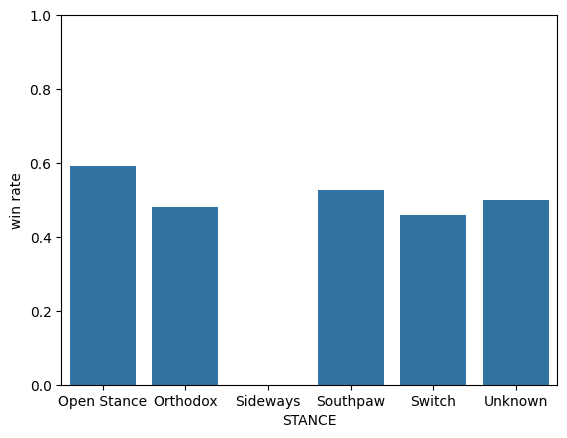

In [33]:

sns.barplot(data=win_stance, x='STANCE', y='WinRate')  # draws the bars
plt.ylim(0,1)  # set y-axis from 0 to 1 (0% to 100%)
plt.ylabel('win rate')  # label for y-axis


### Although the conclusion may be a little inaccurate because of a lack of data samples for most stances, this shows that a stance doesn't make a significant difference in a fight outcome. 

### Moving on to the next question: Do fighters of a certain age win more often?

In [34]:
# again I need to stack all the fighers

fighters_age = pd.DataFrame( { 'Fighter': pd.concat([fights['FIGHTER1'], fights['FIGHTER2']])   })


In [35]:
fighters_age['Age'] = pd.concat([fights['F1_AGE'], fights['F2_AGE']])
fighters_age.head(2)

,Fighter,Age
0,Nassourdine Imavov,30.0
1,Benoit Saint Denis,29.0


In [36]:
# same process for win/loss as last analysis

fighters_age['Win'] = pd.concat([
    (fights['WINNER'] == fights['FIGHTER1']).astype(int),
    (fights['WINNER'] == fights['FIGHTER2']).astype(int)
])


In [37]:
# creating age brackets because i dont want every single age on the outcome

bins = [19, 24, 29, 35, 45]

labels = ['20-24', '25-29', '30-35', '36-45']  # easy labels for the bins

fighters_age["AGE_GROUP"] = pd.cut(fighters_age["Age"], bins= bins, labels = labels, right=True)


In [38]:
# now it's ready to group and perform calculations
win_age = fighters_age.groupby('AGE_GROUP')['Win'].agg(['mean','count']).reset_index()



C:\Users\izzat\AppData\Local\Temp\ipykernel_21056\1994182627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_age = fighters_age.groupby('AGE_GROUP')['Win'].agg(['mean','count']).reset_index()


In [39]:
win_age = win_age.rename(columns = {
    "mean" : "WinRate",
    "count" : "Fights"
})

win_age

,AGE_GROUP,WinRate,Fights
0,20-24,0.571429,21
1,25-29,0.566327,392
2,30-35,0.519851,2418
3,36-45,0.484389,5669


<Axes: xlabel='AGE_GROUP', ylabel='WinRate'>

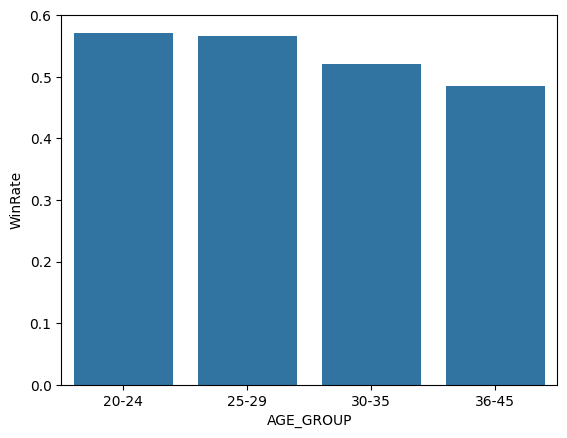

In [40]:
sns.barplot(data=win_age, x='AGE_GROUP', y='WinRate')


`This data might have inconsistencies because of the difference in data samples for each category but overall there isn't a significant difference between age brackets and win %`

Insights:
1. The Light Heavyweight and Heavyweights unsurprisingly have the highest average heights and reaches
2. There is a very small positive correlation between fighters' ages and win rate
3. The Middleweight, Light Heavyweight and Heavyweight weight classes have the highest KO's in UFC while all the other weight classes end up with Unanimous decisions
4. The fighter's stance does not affect win rates
5. The fighters in the 20-24 age group have the highest win rates in UFC

### Challenges and Lessons Learned

- While splitting the "BOUT" column to separate fighters, I kept getting "NA" in the WINNER column. 
- The issue turned out to be a tiny typo: I had `" vs"` instead of `" vs."` when using `.str.split()`. 
- Lesson: sometimes major issues have a simple fix.
